# Exploratory Data Analysis

First, we'll import the packages we need to do the exploration.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import gc
import pyarrow.parquet as pq

In [4]:
import os
print(os.listdir("input"))

['metadata_test.csv', 'metadata_train.csv', 'sample_submission.csv', 'test.parquet', 'train.parquet']


## Load in Data

Next, we'll load in the data we are going to explore. 

In [5]:
metadata_train = pd.read_csv("input/metadata_train.csv")
metadata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 4 columns):
signal_id         8712 non-null int64
id_measurement    8712 non-null int64
phase             8712 non-null int64
target            8712 non-null int64
dtypes: int64(4)
memory usage: 272.3 KB


In [6]:
metadata_train.head(12)

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1
5,5,1,2,1
6,6,2,0,0
7,7,2,1,0
8,8,2,2,0
9,9,3,0,0


In [7]:
metadata_test = pd.read_csv("input/metadata_test.csv")
metadata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20337 entries, 0 to 20336
Data columns (total 3 columns):
signal_id         20337 non-null int64
id_measurement    20337 non-null int64
phase             20337 non-null int64
dtypes: int64(3)
memory usage: 476.7 KB


In [8]:
metadata_test.head(12)

,signal_id,id_measurement,phase
0,8712,2904,0
1,8713,2904,1
2,8714,2904,2
3,8715,2905,0
4,8716,2905,1
5,8717,2905,2
6,8718,2906,0
7,8719,2906,1
8,8720,2906,2
9,8721,2907,0


In [9]:
sample_submission = pd.read_csv("input/sample_submission.csv")
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20337 entries, 0 to 20336
Data columns (total 2 columns):
signal_id    20337 non-null int64
target       20337 non-null int64
dtypes: int64(2)
memory usage: 317.8 KB


In [10]:
sample_submission.head(12)

,signal_id,target
0,8712,0
1,8713,0
2,8714,0
3,8715,0
4,8716,0
5,8717,0
6,8718,0
7,8719,0
8,8720,0
9,8721,0


## Training Set Preparation

We will break up the data set into a training set and a test set to build our machine learning model. First, we will get the training set. 

In [13]:
train = pq.read_pandas('input/train.parquet').to_pandas()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB


In [15]:
train.iloc[0:7,0:10]

,0,1,2,3,4,5,6,7,8,9
0,18,1,-19,-16,-5,19,-15,15,-1,-16
1,18,0,-19,-17,-6,19,-17,16,0,-15
2,17,-1,-20,-17,-6,19,-17,15,-3,-15
3,18,1,-19,-16,-5,20,-16,16,0,-15
4,18,0,-19,-16,-5,20,-17,16,-2,-14
5,18,0,-20,-15,-4,20,-16,15,-2,-12
6,19,1,-18,-16,-5,20,-16,16,-1,-13


In [16]:
x = train.index
y = train.iloc[:,0]

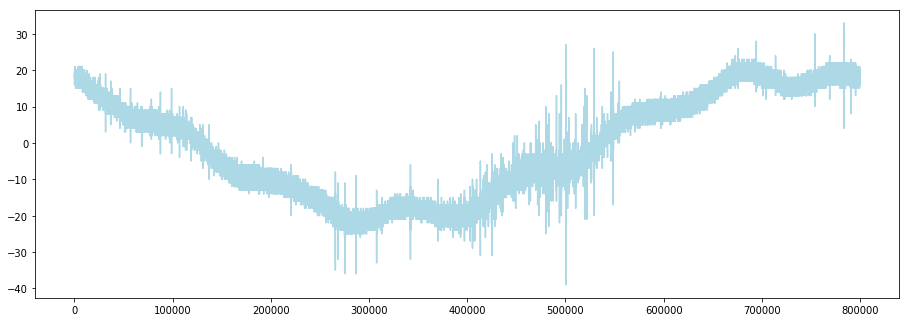

In [17]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(x,y,color='lightblue')

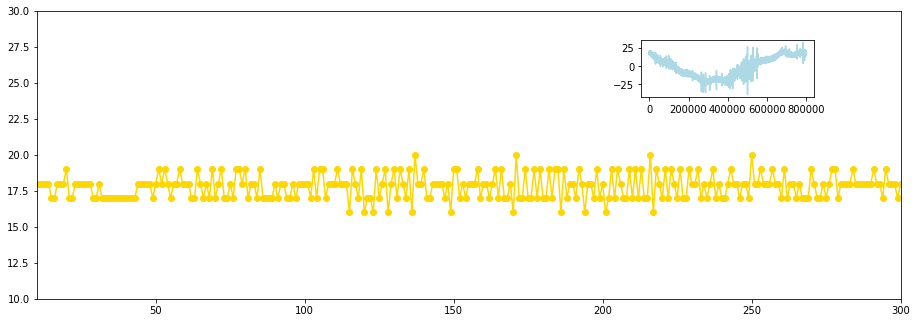

In [18]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_xlim([10,300])
ax1.set_ylim([10,30])
ax1.plot(x,y,marker='o', color='gold')
ax2 = fig.add_axes([0.7,0.7,0.2,0.2])
ax2.plot(x,y, color='lightblue')

Let's look at some good signals.

In [19]:
x = train.index
y0 = train.iloc[:,0]
y1 = train.iloc[:,1]
y2 = train.iloc[:,2]

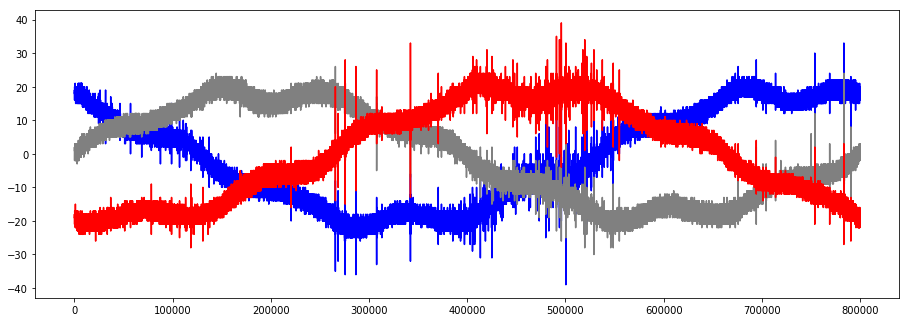

In [20]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(x,y0,color='blue')
ax1.plot(x,y1,color='grey')
ax1.plot(x,y2,color='red')

In [21]:
print("Mean: " + str(np.mean(y0)))
print("Min: " + str(np.min(y0)))
print("Max: " + str(np.max(y0)))
print("Std: " + str(np.std(y0)))

Mean: -0.96027125
Min: -39
Max: 33
Std: 13.870724309725986


Now let's look at some bad signals.

In [22]:
z0 = train.iloc[:,3]
z1 = train.iloc[:,4]
z2 = train.iloc[:,5]

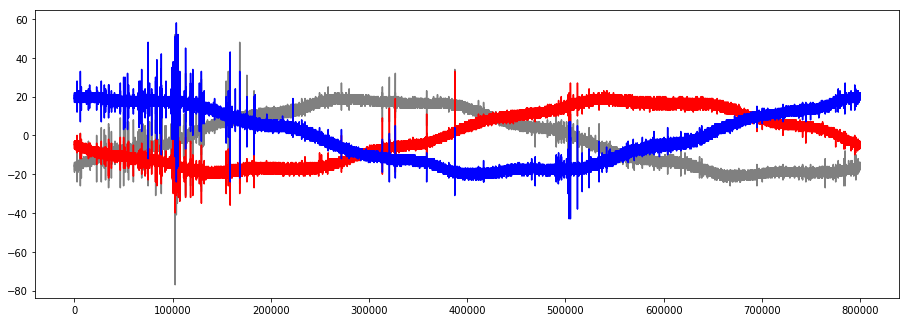

In [23]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(x,z0,color='grey')
ax1.plot(x,z1,color='red')
ax1.plot(x,z2,color='blue')

In [24]:
print("Mean: " + str(np.mean(z0)))
print("Min: " + str(np.min(z0)))
print("Max: " + str(np.max(z0)))
print("Std: " + str(np.std(z0)))

Mean: -0.99740125
Min: -77
Max: 52
Std: 13.673629986089956


In [25]:
num_rows = train.shape[0]
num_rows

800000

In [26]:
index_group_size = 100

In [27]:
time_samples = np.arange(0,num_rows, 100)
time_samples[0:10]

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [28]:
train_down=train.iloc[time_samples,:]
train_down.iloc[:, 0:10].head()

,0,1,2,3,4,5,6,7,8,9
0,18,1,-19,-16,-5,19,-15,15,-1,-16
100,18,1,-19,-16,-5,20,-18,16,-1,-17
200,18,1,-19,-16,-5,20,-17,15,-3,-16
300,18,1,-18,-15,-4,21,-16,17,0,-18
400,18,1,-18,-16,-5,20,-18,16,0,-16


In [29]:
import numpy.fft as ft

In [30]:
def Amplitude(z):
    return np.abs(z)

In [31]:
def Phase(z):
    return (np.arctan2(z.imag,z.real))

In [32]:
df_harm=pd.DataFrame()

In [33]:
def find_dfa(df_source, df_dest,num_harm,base_col):
    # init
    dfa=df_dest.iloc[:,0:base_col]
    num_ap_cols = int(num_harm/2)
    for j in range(0,num_ap_cols) :
        dfa['Amp'+str(j)] = 0
        dfa['Pha'+str(j)] = 0
    dfa['ErrFun'] = 0
    dfa['ErrGen'] = 0
    # calc
    for i in range(0,len(df_source.columns)):
        dfa.loc[i]=0
        s=df_source.iloc[:,base_col+i]
        SF=ft.rfft(s)
        SF_Fundam=np.zeros(SF.size, dtype=np.complex_)
        SF_Filtered=np.zeros(SF.size, dtype=np.complex_)
        SF_Fundam[0:2]=SF[0:2]
        SF_Filtered[0:num_harm]=SF[0:num_harm]
        s_fun_rec=ft.irfft(SF_Fundam)
        s_gen_rec=ft.irfft(SF_Filtered)
        for j in range(0,num_ap_cols):
            dfa.iloc[i,base_col+2*j] = Amplitude(SF_Filtered[j])
            dfa.iloc[i,base_col+2*j+1] = Phase(SF_Filtered[j])
        dfa.iloc[i,base_col+2*num_ap_cols] = np.sqrt(np.mean((s-s_fun_rec)**2))
        dfa.iloc[i,base_col+2*num_ap_cols+1] = np.sqrt(np.mean((s-s_gen_rec)**2))
    return dfa

In [39]:
train_max = train.apply(np.max)
train_min = train.apply(np.min)

In [40]:
train_mean = train_down.apply(np.mean)
train_std = train_down.apply(np.std)

In [41]:
df_harm=pd.DataFrame()
num_harm=10
df_harm=find_dfa(train_down,df_harm,num_harm,0)

In [37]:
df_harm.iloc[:,0:10].head()

""


In [42]:
metadata_train['mean']=train_mean.values
metadata_train['max']=train_max.values
metadata_train['min']=train_min.values
metadata_train['std']=train_std.values
for j in range(0,int(num_harm/2)) :
    metadata_train['Amp'+str(j)] = df_harm['Amp'+str(j)]
    metadata_train['Pha'+str(j)] = df_harm['Pha'+str(j)]
metadata_train['ErrFun'] = df_harm['ErrFun']
metadata_train['ErrGen'] = df_harm['ErrGen']

In [43]:
metadata_train.head()

,signal_id,id_measurement,phase,target,mean,max,min,std,Amp0,Pha0,Amp1,Pha1,Amp2,Pha2,Amp3,Pha3,Amp4,Pha4,ErrFun,ErrGen
0,0,0,0,0,-0.955625,33,-39,13.875082,7645.0,3.141593,77646.997989,0.565379,312.482475,-0.220529,555.905375,-0.142607,725.516282,-0.031373,2.027288,1.077001
1,1,0,1,0,-0.194250,26,-30,13.040534,1554.0,3.141593,72982.097221,-1.524697,238.348502,2.825956,653.633666,-2.782895,879.208223,-2.285654,1.898931,1.030193
2,2,0,2,0,-0.053000,39,-28,13.683245,424.0,3.141593,76638.532646,2.683598,50.933339,-2.321062,337.296314,2.089102,674.694524,1.896273,1.919745,1.068946
3,3,1,0,1,-0.995500,52,-77,13.669875,7964.0,3.141593,76936.076004,-2.398836,38.728609,-3.066331,254.582152,-2.665527,295.647834,-2.260187,1.375404,0.951130
4,4,1,1,1,-0.157625,33,-40,12.944276,1261.0,3.141593,72845.386093,1.793845,60.280461,1.176265,393.890115,1.371384,261.512972,1.711504,1.314423,0.857353


In [44]:
df_train = metadata_train
df_train.to_csv('df_train.csv', index=False)

## Test Set Preparation

Now we'll extract the test set. 

In [45]:
col_group_size = 2000
gc.collect()

771

In [46]:
metadata_test = pd.read_csv("input/metadata_test.csv")

In [47]:
metadata_test['target']=-1
metadata_test['mean']=0
metadata_test['max']=0
metadata_test['min']=0
metadata_test['std']=0
for j in range(0,int(num_harm/2)) :
    metadata_test['Amp'+str(j)] = 0
    metadata_test['Pha'+str(j)] = 0
metadata_test['ErrFun'] = 0
metadata_test['ErrGen'] = 0

In [48]:
metadata_test.shape

(20337, 20)

In [49]:
metadata_test.head()

,signal_id,id_measurement,phase,target,mean,max,min,std,Amp0,Pha0,Amp1,Pha1,Amp2,Pha2,Amp3,Pha3,Amp4,Pha4,ErrFun,ErrGen
0,8712,2904,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8713,2904,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8714,2904,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8715,2905,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8716,2905,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
def add_info_test(metadata_df,time_sample_idx_1,col_group_size):
    col_id_start_0=np.min(metadata_test['signal_id'])
    col_id_start=col_id_start_0
    col_id_last=np.max(metadata_test['signal_id'])+1
    n_groups = int(np.round((col_id_last-col_id_start)/col_group_size))
    print('Steps = {}'.format(n_groups))
    for i in range(0,n_groups):
        col_id_stop = np.minimum(col_id_start+col_group_size,col_id_last)
        col_numbers = np.arange(col_id_start,col_id_stop)
        print('Step {s} - cols = [{a},{b})'.format(s=i,a=col_id_start,b=col_id_stop))
        print('   Adding Stats...',end="")
        col_names = [str(col_numbers[j]) for j in range(0,len(col_numbers))]
        test_i = pq.read_pandas('input/test.parquet',columns=col_names).to_pandas()
        test_i_d1=test_i.iloc[time_sample_idx_1,:]
        test_mean_i = test_i_d1.apply(np.mean)
        test_max_i  = test_i.apply(np.max)
        test_min_i  = test_i.apply(np.min)
        test_std_i  = test_i_d1.apply(np.std)
        r_start = col_id_start - col_id_start_0
        r_stop = r_start + (col_id_stop-col_id_start)
        metadata_df.iloc[r_start:r_stop,4] = test_mean_i[0:col_id_stop-col_id_start].values
        metadata_df.iloc[r_start:r_stop,5] = test_max_i[0:col_id_stop-col_id_start].values
        metadata_df.iloc[r_start:r_stop,6] = test_min_i[0:col_id_stop-col_id_start].values
        metadata_df.iloc[r_start:r_stop,7] = test_std_i[0:col_id_stop-col_id_start].values
        print('   Adding FFT...')
        df_harm=pd.DataFrame()
        df_harm=find_dfa(test_i_d1,df_harm,10,0)
        num_ap_cols = int(num_harm/2)
        fft_base_col=8
        for j in range(0, num_ap_cols) :
            metadata_df.iloc[r_start:r_stop,fft_base_col+2*j] = df_harm.iloc[r_start:r_stop,2*j]
            metadata_df.iloc[r_start:r_stop,fft_base_col+2*j+1] = df_harm.iloc[r_start:r_stop,2*j+1]
            metadata_df.iloc[r_start:r_stop,fft_base_col+num_harm] = df_harm.iloc[r_start:r_stop, num_harm]
            metadata_df.iloc[r_start:r_stop,fft_base_col+num_harm+1] = df_harm.iloc[r_start:r_stop, num_harm+1]
            col_id_start=col_id_stop
        return (metadata_df)

In [53]:
metadata_test1=add_info_test(metadata_test,time_samples,col_group_size)

Steps = 10
Step 0 - cols = [8712,10712)
   Adding Stats...   Adding FFT...


In [54]:
metadata_test1.head()

,signal_id,id_measurement,phase,target,mean,max,min,std,Amp0,Pha0,Amp1,Pha1,Amp2,Pha2,Amp3,Pha3,Amp4,Pha4,ErrFun,ErrGen
0,8712,2904,0,-1,-1.020250,28,-46,13.818361,8162.0,3.141593,77677.113236,-0.620609,49.935811,-1.189721,139.942263,2.805564,99.782624,-3.110359,1.546902,0.881698
1,8713,2904,1,-1,-0.185500,30,-25,13.962542,1484.0,3.141593,78486.686167,-2.742483,106.925549,-3.081248,234.950669,0.278456,30.426611,2.294649,1.564478,0.809758
2,8714,2904,2,-1,-0.033500,31,-27,13.809811,268.0,3.141593,77615.091351,1.500708,80.945014,2.585721,330.770856,-0.341953,99.512272,0.129898,1.567698,0.894281
3,8715,2905,0,-1,-0.014125,28,-29,14.104341,113.0,3.141593,78850.060249,-0.663538,84.728526,0.736754,346.407278,2.160238,182.735618,0.275893,2.154252,1.663838
4,8716,2905,1,-1,-1.484625,29,-35,13.572325,11877.0,3.141593,75911.978182,1.319117,51.456168,0.725883,267.470287,0.116584,157.496671,1.205467,2.031225,1.584932


In [55]:
metadata_test1.shape

(20337, 20)

In [56]:
metadata_test1.iloc[0:12, :]

,signal_id,id_measurement,phase,target,mean,max,min,std,Amp0,Pha0,Amp1,Pha1,Amp2,Pha2,Amp3,Pha3,Amp4,Pha4,ErrFun,ErrGen
0,8712,2904,0,-1,-1.020250,28,-46,13.818361,8162.0,3.141593,77677.113236,-0.620609,49.935811,-1.189721,139.942263,2.805564,99.782624,-3.110359,1.546902,0.881698
1,8713,2904,1,-1,-0.185500,30,-25,13.962542,1484.0,3.141593,78486.686167,-2.742483,106.925549,-3.081248,234.950669,0.278456,30.426611,2.294649,1.564478,0.809758
2,8714,2904,2,-1,-0.033500,31,-27,13.809811,268.0,3.141593,77615.091351,1.500708,80.945014,2.585721,330.770856,-0.341953,99.512272,0.129898,1.567698,0.894281
3,8715,2905,0,-1,-0.014125,28,-29,14.104341,113.0,3.141593,78850.060249,-0.663538,84.728526,0.736754,346.407278,2.160238,182.735618,0.275893,2.154252,1.663838
4,8716,2905,1,-1,-1.484625,29,-35,13.572325,11877.0,3.141593,75911.978182,1.319117,51.456168,0.725883,267.470287,0.116584,157.496671,1.205467,2.031225,1.584932
5,8717,2905,2,-1,-1.452625,25,-29,13.333670,11621.0,3.141593,74494.994134,-2.869458,54.963574,-1.026549,404.353871,-0.161866,225.276722,-2.580586,2.089199,1.554689
6,8718,2906,0,-1,-1.185625,29,-30,14.277917,9485.0,3.141593,79633.121243,-2.328687,151.887880,1.096928,376.919730,1.233942,125.715368,0.247751,2.385185,2.228577
7,8719,2906,1,-1,-1.947375,35,-44,15.914965,15579.0,3.141593,88864.005130,1.921289,122.786589,-1.089530,394.970666,0.695007,40.819802,-2.665630,2.551617,2.420438
8,8720,2906,2,-1,0.897500,28,-28,14.979244,7180.0,0.000000,83818.156357,-0.089902,22.760629,2.154470,828.305972,-2.198282,84.401893,-2.629334,2.198042,2.008074
9,8721,2907,0,-1,-0.997625,36,-31,14.088963,7981.0,3.141593,79254.274958,-1.900479,30.360223,1.342049,96.706908,-0.936432,350.482030,2.398050,1.486646,1.160283


In [57]:
metadata_test1.to_csv('df_test.csv', index=False)

### Now that we have our training and test sets, let's move on to building and testing our predictive model. 